In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.stats as ss
import scipy.special as sp

In [52]:
np.random.seed(20)

In [74]:
def plot_poisson_density(lamda, xmax, fmt, label):
        x = np.arange(2, xmax,0.0001)
        y=[]
        for i in x:
          y = np.append(y,(np.power(lamda,i)*np.exp(-1*lamda))/factorial(i))

        plt.plot(x, y, fmt, label=label)
        max_index = np.argmax(y)
        print(f'maximum value in this distribution is {x[max_index]}')

In [75]:
def generate_sample(lamda,n,color):
  out = np.random.poisson(lam=lamda,size=n)
  mu = estimate(out)
  print(f'mu in {n} samples is: {mu}')
  # plot the density according to the estimated mean
  plot_poisson_density(mu, 7, color + "--", label="MLE in %d samples" % n)
  return out

In [58]:
def estimate(samples):
  mu = np.mean(samples)
  return mu

mu in 10 samples is: 3.9
maximum value in this distribution is 3.389400000002932
mu in 100 samples is: 4.47
maximum value in this distribution is 3.9607000000041377
mu in 3000 samples is: 4.939666666666667
maximum value in this distribution is 4.43130000000513
mu in 5000 samples is: 5.0236
maximum value in this distribution is 4.515300000005308


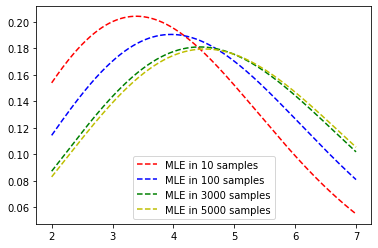

In [78]:
sample1 = generate_sample(5,10,'r')
sample2 = generate_sample(5,100,'b')
sample3 = generate_sample(5,3000,'g')
sample4 = generate_sample(5,5000,'y')
plt.legend()
plt.show()

In [45]:
sizes=[10,100,3000,5000]
lam=5
np.random.seed(20)
par1 = 2
par2 = 0.5

In [46]:
lam_value = np.linspace(0,10,100)
prior = lambda x: ss.gamma.pdf(lam_value, a=par1, scale=1/par2)

def posterior(lam_value,data):
    an = par1 + data.sum()
    bn = par2 + data.size
    output = ss.gamma.pdf(lam_value, an, scale=1/bn)
    return output,lam_value[np.argmax(output)]

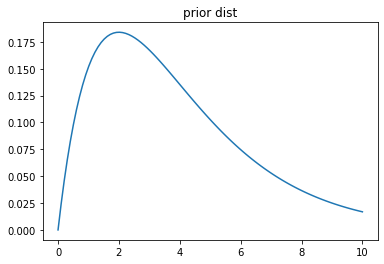

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(x, ss.gamma.pdf(x,a=par1,scale=1/par2))
plt.title('prior dist');

MAP is 5.454545454545454
MAP is 5.151515151515151
MAP is 5.05050505050505
MAP is 5.05050505050505


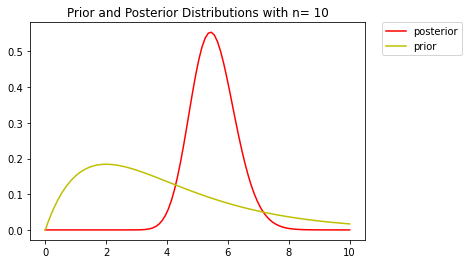

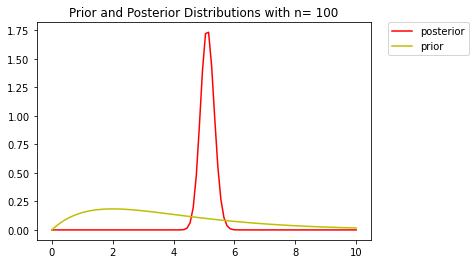

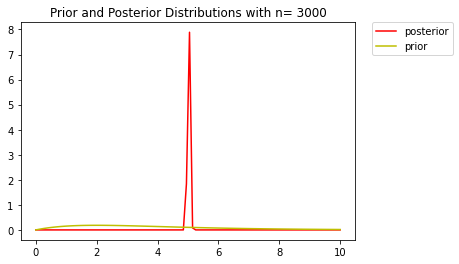

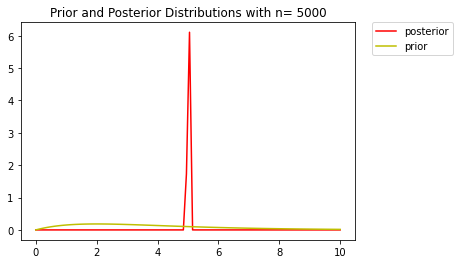

In [48]:
for i in sizes:
    np.random.seed(20)
    data=np.random.poisson (size=i, lam=lam)
    plt.figure(figsize=(6, 4))
    posterior_value,lmap = posterior(lam_value,data)
    print('MAP is ' + str(lmap))
    prior_value = prior(lam_value)
    plt.plot(lam_value, posterior_value,'r-',label='posterior')
    plt.plot(lam_value, prior_value, 'y-',label='prior')
    plt.title('Prior and Posterior Distributions with n= ' + str(i));
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0, 0.5, 'map & mle')

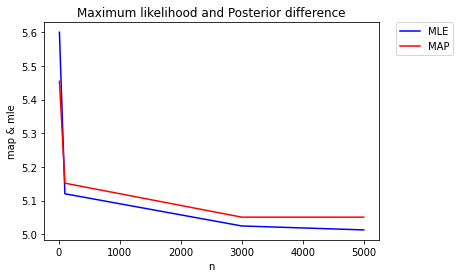

In [49]:
range=10
sizes=[10,100,3000,5000]
p=0;
lmle_n=[]
lmap_n=[]
for i in sizes:
  np.random.seed(20)
  data=np.random.poisson (size=i, lam=lam)
  lmle=np.mean(data)
  posterior_value,lmap = posterior(x,data)
  lmle_n.append(lmle)
  lmap_n.append(lmap)  

plt.figure(figsize=(6, 4))
plt.plot(sizes, lmle_n,'b-',label='MLE') 
plt.plot(sizes, lmap_n,'r-',label='MAP')
plt.title('Maximum likelihood and Posterior difference');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("map & mle")

we see that Map is better than Mle with highest sample number but mle is better in low sample number

help reference : juanitorduz.github.io website